In [140]:
import numpy as np
import pandas as pd
import os

df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [142]:
df.duplicated().sum()

0

In [143]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [144]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [145]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [146]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True,axis=1)

In [147]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [149]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [150]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [151]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [152]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [153]:
X_train.shape

(8000, 11)

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [155]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [156]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [157]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [160]:
history = model.fit(X_train,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2049 - loss: 1.1084 - val_accuracy: 0.5219 - val_loss: 0.7082
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.6480 - val_accuracy: 0.7969 - val_loss: 0.5392
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.5305 - val_accuracy: 0.7969 - val_loss: 0.5085
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7988 - loss: 0.5057 - val_accuracy: 0.7969 - val_loss: 0.5028
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7989 - loss: 0.5010 - val_accuracy: 0.7969 - val_loss: 0.5019
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.5129 - val_accuracy: 0.7969 - val_loss: 0.5011
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.4964 - val_accuracy: 0.7969 - val_loss: 0.5004
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.5027 - val_accuracy: 0.

In [161]:
model.layers[1].get_weights()

[array([[ 0.09137125,  0.00208413, -0.32726777, -0.31868255, -0.11652908,
          0.358877  ,  0.28996795, -0.38972628, -0.30448505, -0.3576959 ,
         -0.24253114],
        [ 0.7109613 ,  0.26331618, -0.15351896, -0.05591711,  0.28183025,
         -0.1236026 ,  0.28075972, -0.40501505,  0.3389183 , -0.42912027,
         -0.48050287],
        [ 0.31466442,  0.30926543, -0.25364992,  0.02103817, -0.08690155,
         -0.5408415 ,  0.03764258, -0.3937889 , -0.23304339,  0.1726289 ,
          0.11805474],
        [ 0.02994106,  0.3328739 , -0.6012456 ,  0.50135416,  0.4703052 ,
          0.23640509,  0.12804474, -0.7167083 , -0.54847664, -0.39927748,
         -0.1913253 ],
        [ 0.03640812,  0.02724208,  0.19765742, -0.04117423,  0.21214591,
         -0.37278983, -0.5738592 ,  0.18425785, -0.21963508, -0.14219293,
          0.22278726],
        [-0.01116934,  0.03353681, -0.02822447, -0.34265214,  0.2737824 ,
          0.13181625, -0.46174222, -0.5950926 ,  0.11100028, -0.0511200

In [162]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [163]:
y_pred

array([[0.17452623],
       [0.20929873],
       [0.21823113],
       ...,
       [0.21823113],
       [0.23930714],
       [0.17452623]], dtype=float32)

In [164]:
# y_pred = y_pred.argmax(axis=-1)
y_pred=np.where(y_pred>0.5,1,0)

In [165]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [167]:
import matplotlib.pyplot as plt
history.history



{'accuracy': [0.21718749403953552,
  0.7518749833106995,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716],
 'loss': [0.95503830909729,
  0.6038146615028381,
  0.5209445953369141,
  0.5069267153739929,
  0.5047155618667603,
  0.5037989616394043,
  0.5028626322746277,
  0.5031366348266602,
  0.5029221177101135,
  0.5027202367782593],
 'val_accuracy': [0.5218750238418579,
  0.796875,
  0.796875,
  0.796875,
  0.796875,
  0.796875,
  0.796875,
  0.796875,
  0.796875,
  0.796875],
 'val_loss': [0.7081984877586365,
  0.5391985774040222,
  0.5085099935531616,
  0.5028474926948547,
  0.5019364356994629,
  0.5010866522789001,
  0.5004482269287109,
  0.5004009008407593,
  0.5000631809234619,
  0.4998481273651123]}

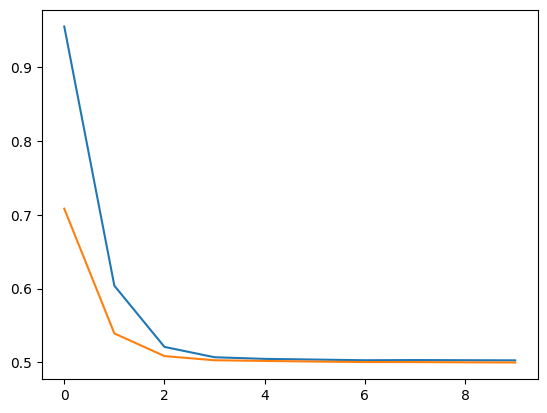

In [168]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

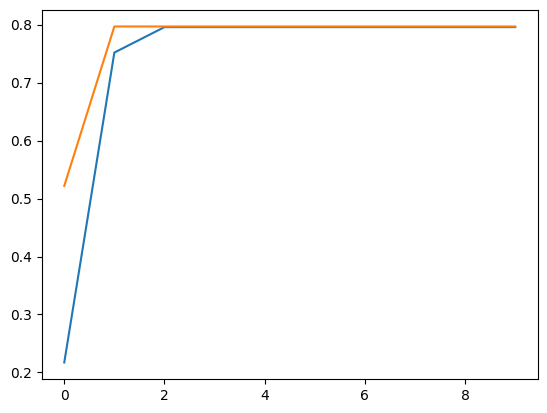

In [169]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])